In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

In [27]:
#Importing the dataset
df = pd.read_csv("HW2Q4.csv")
X = df.iloc[:, [0, 1]].values
y = df.iloc[:, 2].values
df

,X1,X2,Y
0,3.25,7.956,2
1,3.30,2.200,0
2,3.32,3.410,0
3,3.35,10.272,2
4,4.01,1.650,0
5,4.03,2.510,0
6,4.05,4.210,0
7,4.05,7.380,2
8,4.06,11.412,2
9,4.07,9.198,2


In [38]:
#3 Splitting the dataset into the Training set and Test set
#Totally 24 rows of data and 20 for training set and 4 for test sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)
X_train, X_test, y_train, y_test

(array([[ 5.28 , 10.008],
        [ 6.01 ,  6.01 ],
        [ 9.38 ,  7.34 ],
        [ 4.06 , 11.412],
        [ 4.05 ,  4.21 ],
        [ 9.4  ,  8.21 ],
        [ 4.01 ,  1.65 ],
        [ 3.32 ,  3.41 ],
        [ 4.03 ,  2.51 ],
        [10.2  ,  6.52 ],
        [ 4.07 ,  9.198],
        [ 4.05 ,  7.38 ],
        [10.8  ,  7.72 ],
        [ 3.35 , 10.272],
        [ 3.25 ,  7.956],
        [ 9.1  ,  6.5  ],
        [ 8.23 ,  7.95 ],
        [ 5.25 ,  7.866]]),
 array([[5.24, 3.41],
        [5.22, 2.15],
        [3.5 , 9.5 ],
        [8.15, 6.3 ],
        [4.01, 3.02],
        [3.3 , 2.2 ]]),
 array([2, 0, 1, 2, 0, 1, 0, 0, 0, 1, 2, 2, 1, 2, 2, 0, 1, 2], dtype=int64),
 array([0, 0, 0, 1, 0, 0], dtype=int64))

In [29]:
#4 Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

#It does not need to scale y_train because it contains categorical #data 
"""sc_y = StandardScaler()
y_train = sc_y.fit_transform(y_train)"""

'sc_y = StandardScaler()\ny_train = sc_y.fit_transform(y_train)'

In [30]:
#Fitting the Logistic Regression to the Training Set: 
#Import the LogisticRegression class from the sklearn.linear_model
#library
from sklearn.linear_model import LogisticRegression

#There are many optional parameters. Lets only use random_state=0
#We create a classifier object of LR class
classifier= LogisticRegression(random_state=0)

#Fit logistic regression model to the training set (X_train and #y_train)
classifier.fit(X_train, y_train)

#Predicting the Test set results
#Using predict method for the classifier object and put X_test for #argument
y_pred = classifier.predict(X_test)

In [31]:
#Making the Confusion Matrix. It contains the correct and #incorrect predictions of our model 
#import confusion_matrix function from sklearn.metrics library
from sklearn.metrics import confusion_matrix

#y_true parameter will be y_test
#y_pred is the logistic regression model prediction
cm=confusion_matrix(y_test, y_pred)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


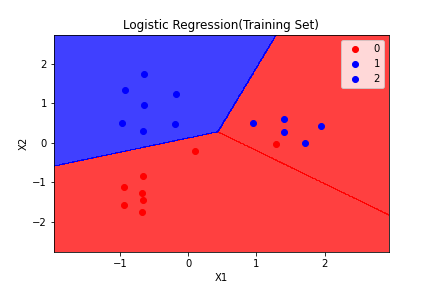

<Figure size 432x288 with 0 Axes>

In [33]:
#Visualizing the Training Set results: 
#ListedColormap class help us to colorize the data points.
from matplotlib.colors import ListedColormap

#Create local variables X_set and y_set. Because we use these #variables again in the test set
X_set, y_set= X_train, y_train

#Create the grid. step=0.01 means all the pixels were actually with #a 0.01 resolution. min and max of the 
#X_Set use with minus ana plus one to prevent ponits to be squeezed #on the axes.
X1,X2 = np.meshgrid(np.arange(start =X_set[:, 0].min() -1, stop=X_set[:, 0].max()+1, step = 0.01),
                    np.arange(start =X_set[:, 1].min() -1, stop=X_set[:, 1].max()+1, step = 0.01))

#This is the line applying the classifier on all the pixel #observation points. It colors all the red pixel 
#points and the blue pixel points. contour function make the contour #between red and blue regions.
plt.contourf(X1,X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),alpha=0.75, 
             cmap = ListedColormap(('red','blue')))

#plot the limits of the age and the estimated salary lines.
plt.xlim((X1.min(),X1.max()))
plt.ylim((X2.min(),X2.max()))
#This loop here plots all the data points that are the real values.
 
for i,j in enumerate(np.unique(y_set)):
     plt.scatter(X_set[y_set==j,0], X_set[y_set==j,1], c= ListedColormap(('red','blue'))(i) ,label= j)
        
#Add the name of the plot and the labels.
plt.title('Logistic Regression(Training Set)')
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend()
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


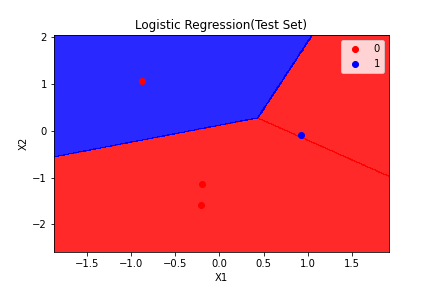

<Figure size 432x288 with 0 Axes>

In [35]:
#9 Visualizing the Test Set results:
from matplotlib.colors import ListedColormap
X_set, y_set= X_test, y_test
X1,X2 = np.meshgrid(np.arange(start =X_set[:, 0].min() -1, stop=X_set[:, 0].max()+1, step = 0.01),
                    np.arange(start =X_set[:, 1].min() -1, stop=X_set[:, 1].max()+1, step = 0.01))
plt.contourf(X1,X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),alpha=0.84, 
             cmap = ListedColormap(('red','blue')))
plt.xlim((X1.min(),X1.max()))
plt.ylim((X2.min(),X2.max()))
for i,j in enumerate(np.unique(y_set)):
     plt.scatter(X_set[y_set==j,0], X_set[y_set==j,1], c= ListedColormap(('red','blue'))(i) ,label= j) 
plt.title('Logistic Regression(Test Set)')
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend()
plt.show()